# Basic Visualization with `matplotlib`

Python's most commonly used plotting library is [matplotlib](http://matplotlib.org/). The library has an interface which mirrors that of Mathworks' [Matlab](http://www.mathworks.com/help/matlab/2-and-3d-plots.html) software, and so those with matlab familiarity will find themselves already high up on the learning curve.

### Loading `matplotlib` and setting up the notebook environment
The matplotlib plotting library has a [magic](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-pylab) connection with the iPython shell and the notebook environment that allows static images of plots to be rendered in the notebook. Instead of using the normal `import ...` syntax, we'll use this iPython 'magic' to not only import the library, but set up the environment we'll need to create plots.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data to plot
We'll use the emissions data we saw before in the Pandas tutorial, as it's familiar:

In [2]:
import pandas as pd
emissions = pd.read_csv('../../data/Climate/global_emissions.csv', 
                        skiprows=2, index_col='Year',
                        names=['Year', 'Total Emissions', 
                               'Gas Emissions', 'Liquid Emissions', 
                               'Solid Emissions', 'Cement Emissions', 
                               'Flare Emissions', 'Per Capita Emissions'])

emissions.head(3)

/Users/houghton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,Total Emissions,Gas Emissions,Liquid Emissions,Solid Emissions,Cement Emissions,Flare Emissions,Per Capita Emissions
Year,,,,,,,
1751,3,0,0,3,0,0,NaN
1752,3,0,0,3,0,0,NaN
1753,3,0,0,3,0,0,NaN


### Basic plotting
The basic plot command takes as its first two arguments the x and y values of the points which we wish to plot:

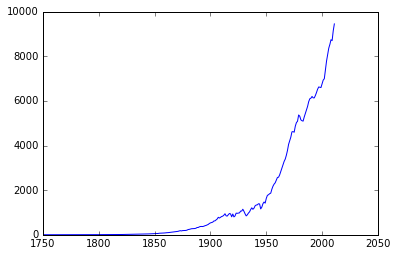

In [3]:
plt.plot(emissions.index, emissions['Total Emissions']);

### Labeling axes and title
Following out plot command we can submit commands to [add text to the figure](http://matplotlib.org/users/pyplot_tutorial.html#working-with-text), such as adding labels to the x and y axes, and a title to the figure.

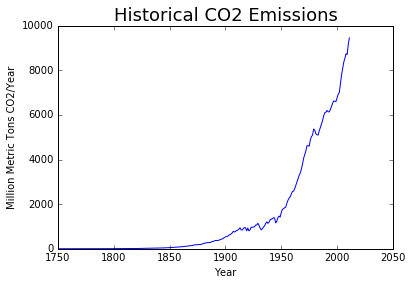

In [4]:
plt.plot(emissions.index, emissions['Total Emissions'])
plt.xlabel('Year')
plt.ylabel('Million Metric Tons CO2/Year')
plt.title('Historical CO2 Emissions', fontsize=18);

### Changing line properties
We can include various elements into the plot command to [specify how the line will look](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties):

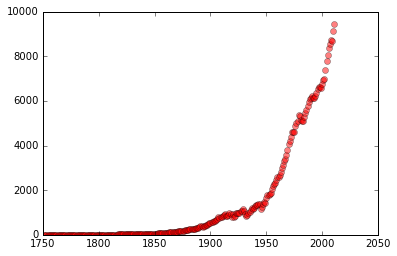

In [5]:
plt.plot(emissions.index, emissions['Total Emissions'], 'ro', alpha=.5);

### Specifying axis bounds
We can specify that we want our plot to be bounded by various x and y values:

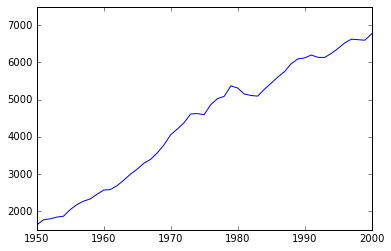

In [6]:
plt.plot(emissions.index, emissions['Total Emissions'])
plt.xlim(1950,2000)
plt.ylim(1500,7500);

### Multiple lines
We can add lines to our plot simply by adding additional calls to the plot function. Passing the plot function an argument called 'label' allows us to format a [legend](http://matplotlib.org/users/legend_guide.html) with appropriate references to each line:

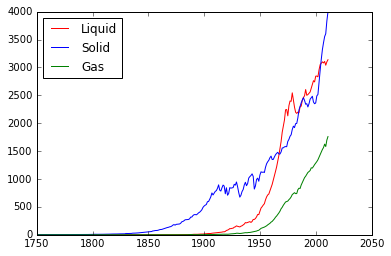

In [7]:
plt.plot(emissions.index, emissions['Liquid Emissions'], 'r', label='Liquid')
plt.plot(emissions.index, emissions['Solid Emissions'], 'b', label='Solid')
plt.plot(emissions.index, emissions['Gas Emissions'], 'g', label='Gas')
plt.legend(loc='upper left');

### Other plot types

There are a number of other plot types available, such as histograms, radial plots, plots with logarithmic axes, or stackplots:

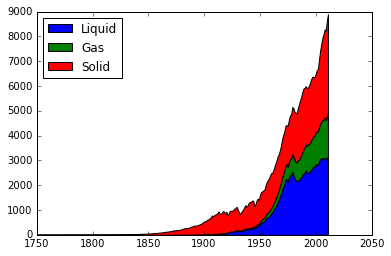

In [8]:
plt.stackplot(emissions.index, [emissions['Liquid Emissions'], 
                                emissions['Gas Emissions'],
                                emissions['Solid Emissions']],
             labels=['Liquid', 'Gas', 'Solid'])
plt.legend(loc='upper left');

### Saving figures
We can save a figure to the disk by calling matplotlib's `savefig` function:

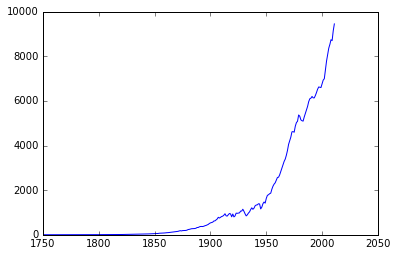

In [9]:
plt.plot(emissions.index, emissions['Total Emissions'])
plt.savefig('Figure_1_Total_Emissions.png')

## Matplotlib and Pandas
Pandas uses matplot lib to provide a basic plotting interface of its own. The dataframe we have been working with has a convenience method called `.plot()`, which assumes some basic format for how you would like your data presented, and tries to do so for you. 

This is handy when you are just interested in having a quick look at your data, without going to the trouble to create finished plots.


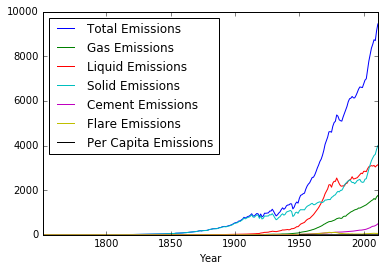

In [10]:
emissions.plot();

The Dataframe's wrapper of matplotlib gives us a number of basic options for how our plots are shown:

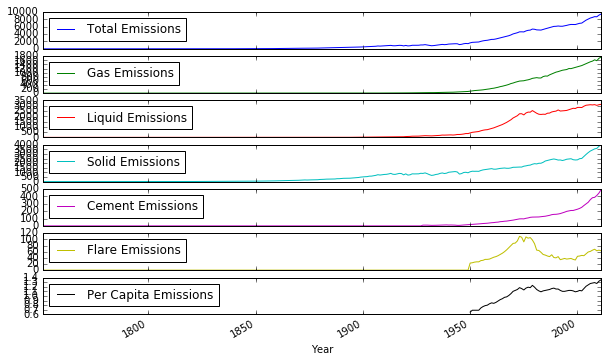

In [11]:
emissions.plot(subplots=True, figsize=(10,6));

## Matplotlib and PySD
As PySD returns a Pandas Dataframe, we can either use the plotting interface directly, or Pandas's convenience wrapper. Here we'll load a model which produces a chaotic output in three dimensions to use in our demonstration.

In [12]:
import pysd
model = pysd.read_vensim('../../models/Roessler_Chaos/roessler_chaos.mdl')
res = model.run()
res.head()

,x,y,z
0.00000,0.500000,0.500000,0.400000
0.03125,0.471875,0.518750,0.341250
0.06250,0.445000,0.536738,0.291747
0.09375,0.419110,0.553999,0.250087
0.12500,0.393982,0.570559,0.215065


Plotting vs. time.

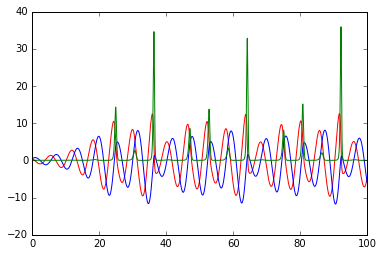

In [13]:
plt.plot(res.index, res['x'], 'r')
plt.plot(res.index, res['y'], 'b')
plt.plot(res.index, res['z'], 'g');

Plotting variables against one another

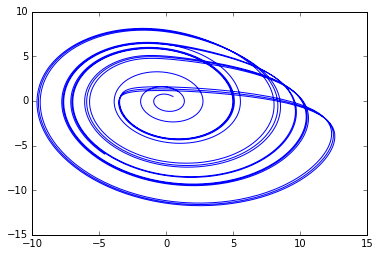

In [14]:
plt.plot(res['x'], res['y']);

While so far I have shown mostly basic, 2d plots, we can also call on [matplotlib's 3d plotting engine](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots)

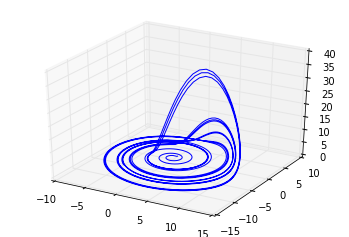

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(res['x'], res['y'], res['z']);

## Resources
- [Gallery](http://matplotlib.org/gallery.html) of different matplotlib graphics, showing what types of plots are possible.
- Getting started with matplotlib [video series](https://www.youtube.com/watch?v=q7Bo_J8x_dw&list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF)